In [3]:
# Load GDP data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load GDP data
GDP = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Annual World GDP Current USD.csv")
print(GDP.head())
print(GDP.tail())
# Rename yield column
GDP.rename(columns={'World GDP (current US$)': 'GDP'}, inplace = True)
print(GDP.head())

# Load coffee price data
# Load robusta prices
robusta_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFROBUSDM.csv")

# Load other mild prices
other_mild_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFOTMUSDM.csv")

# Start all series in 1990 and end all series in 2023
robusta_prices = robusta_prices.head(len(robusta_prices) - 9)
other_mild_prices = other_mild_prices.head(len(other_mild_prices) - 9)
GDP = GDP.tail(len(GDP) - 30)
print(robusta_prices.head())
print(robusta_prices.tail())
print(other_mild_prices.head())
print(other_mild_prices.tail())
print(GDP.head())
print(GDP.tail())

# Create annual average prices for robusta and other mild prices to assess relationship with annual population data
'Annual Average Coffee Bean Prices'
# Create time index for annual mean calculation
robusta_prices.loc[:, 'DATE'] = pd.to_datetime(robusta_prices['DATE'])
robusta_prices.set_index('DATE', inplace=True)
other_mild_prices.loc[:, 'DATE'] = pd.to_datetime(other_mild_prices['DATE'])
other_mild_prices.set_index('DATE', inplace=True)
annual_robusta = robusta_prices.resample('YE').mean()
annual_other_mild = other_mild_prices.resample('YE').mean()
print(annual_robusta.head())
print(annual_robusta.tail())
print(annual_other_mild.head())
print(annual_other_mild.tail())

# Merge series to the same dataframe
GDP.loc[:, 'Year_only'] = GDP['Year']
# Convert 'Year' to datetime and extract the year
annual_other_mild = annual_other_mild.reset_index().rename(columns={'DATE': 'Year'})
annual_robusta = annual_robusta.reset_index().rename(columns={'DATE': 'Year'})
annual_other_mild.loc[:, 'Year'] = pd.to_datetime(annual_other_mild['Year'])
annual_other_mild.loc[:, 'Year_only'] = annual_other_mild['Year'].dt.year
annual_robusta.loc[:, 'Year'] = pd.to_datetime(annual_robusta['Year'])
annual_robusta.loc[:, 'Year_only'] = annual_robusta['Year'].dt.year

combined_df = pd.merge(GDP[['Year_only', 'GDP']], annual_other_mild[['Year_only', 'PCOFFOTMUSDM']], on='Year_only', how='inner')
combined_df = pd.merge(combined_df, annual_robusta[['Year_only', 'PCOFFROBUSDM']], on='Year_only', how='inner')
print(combined_df)

   Year  World GDP (current US$)
0  1960             1.364500e+12
1  1961             1.439320e+12
2  1962             1.542840e+12
3  1963             1.664980e+12
4  1964             1.827780e+12
    Year  World GDP (current US$)
59  2019             8.794560e+13
60  2020             8.557770e+13
61  2021             9.752700e+13
62  2022             1.012250e+14
63  2023             1.054350e+14
   Year           GDP
0  1960  1.364500e+12
1  1961  1.439320e+12
2  1962  1.542840e+12
3  1963  1.664980e+12
4  1964  1.827780e+12
         DATE  PCOFFROBUSDM
0  1990-01-01     50.520000
1  1990-02-01     51.299999
2  1990-03-01     57.680000
3  1990-04-01     57.389999
4  1990-05-01     55.029999
           DATE  PCOFFROBUSDM
403  2023-08-01    124.356522
404  2023-09-01    123.891429
405  2023-10-01    118.835000
406  2023-11-01    122.775909
407  2023-12-01    135.391905
         DATE  PCOFFOTMUSDM
0  1990-01-01     75.829987
1  1990-02-01     84.010010
2  1990-03-01     93.959991
3  199

C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [5]:
# Summary statistics

print(GDP['GDP'].describe())

count    3.400000e+01
mean     5.661991e+13
std      2.586061e+13
min      2.282260e+13
25%      3.207602e+13
50%      5.503235e+13
75%      7.746055e+13
max      1.054350e+14
Name: GDP, dtype: float64


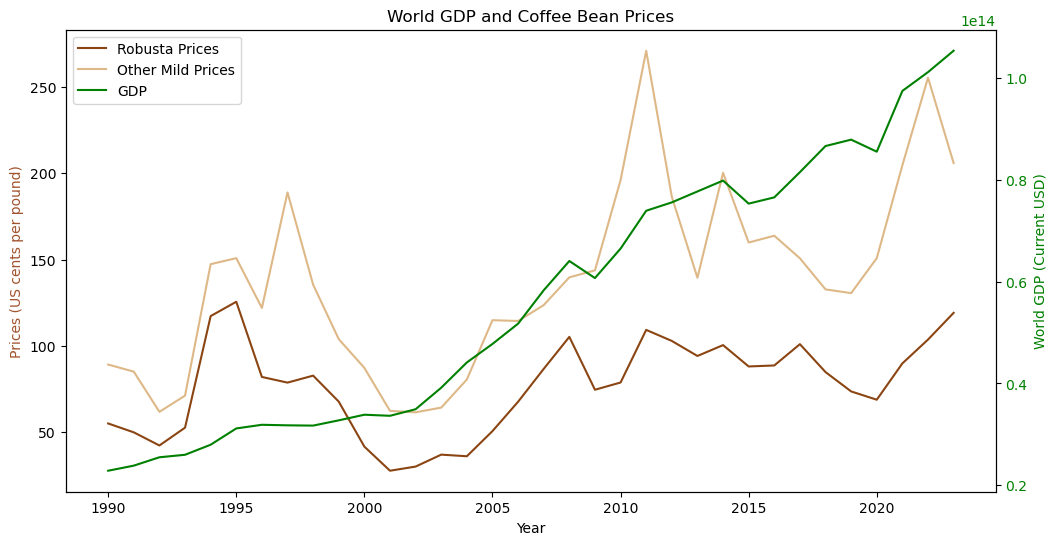

'\nWorld GDP steadily trends upwards, much like world population, which could cause issues of identification.\n'

In [7]:
# Plot of world GDP against coffee production

fig, ax1 = plt.subplots(figsize=(12, 6))
line1 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFROBUSDM'], label='Robusta Prices', color='saddlebrown')
line2 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFOTMUSDM'], label='Other Mild Prices', color='burlywood')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prices (US cents per pound)', color='sienna')

# Create a second y-axis for production
ax2 = ax1.twinx()
line3 = ax2.plot(combined_df['Year_only'], combined_df['GDP'], label='GDP', color='green')
ax2.set_ylabel('World GDP (Current USD)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('World GDP and Coffee Bean Prices')

# Unified legend
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()
fig.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\World GDP and Coffee Bean Prices.png')

'''
World GDP steadily trends upwards, much like world population, which could cause issues of identification.
'''

In [9]:
# Pearson's Rank Correlation Coefficient
from scipy.stats import pearsonr

print('\nRobusta Correlations')
robusta_GDP_corr, robusta_GDP_p_value = pearsonr(combined_df['GDP'], combined_df['PCOFFROBUSDM'])
print(f'Production Pearson correlation: {robusta_GDP_corr} P-value: {robusta_GDP_p_value}')

print('\nOther Mild Correlations')
other_mild_GDP_corr, other_mild_GDP_p_value = pearsonr(combined_df['GDP'], combined_df['PCOFFOTMUSDM'])
print(f'Production Pearson correlation: {other_mild_GDP_corr} P-value: {other_mild_GDP_p_value}')

'''
For both price series, there is very strong evidence against the null hypothesis that they are not correlation with World GDP.
World GDP could be a good proxy for demand for coffee beans. An increase in demand puts upwards pressure on price.
'''


Robusta Correlations
Production Pearson correlation: 0.5335928607964199 P-value: 0.001154915097315981

Other Mild Correlations
Production Pearson correlation: 0.6943539314549043 P-value: 5.237599080538085e-06


'\nFor both price series, there is very strong evidence against the null hypothesis that they are not correlation with World GDP.\nWorld GDP could be a good proxy for demand for coffee beans. An increase in demand puts upwards pressure on price.\n'


***ADF stationarity test***
ADF (constant only) test of GDP data
ADF test statistic: 1.0547602620320804 P-value: 0.994811410265441
(1.0547602620320804, 0.994811410265441, 0, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 1398.8432795544002)
Visually, it is clear that the GDP series does not have a constant mean over time

***ADF trend-stationarity test***
ADF (constant + trend only) test of GDP data
ADF test statistic: -1.93175881759589 P-value: 0.638057205029068
(-1.93175881759589, 0.638057205029068, 0, 33, {'1%': -4.262944107465843, '5%': -3.553092543339733, '10%': -3.2096284957008097}, 1395.9380256478485)
The ADF test does not provide much evidence against the null hypothesis that GDP is not trend stationary.

Differenced World Population
    Year_only           GDP  PCOFFOTMUSDM  PCOFFROBUSDM      GDP_diff
0        1990  2.282260e+13     89.147504     54.986667           NaN
1        1991  2.382360e+13     85.027028     49.832604  1.001000e+

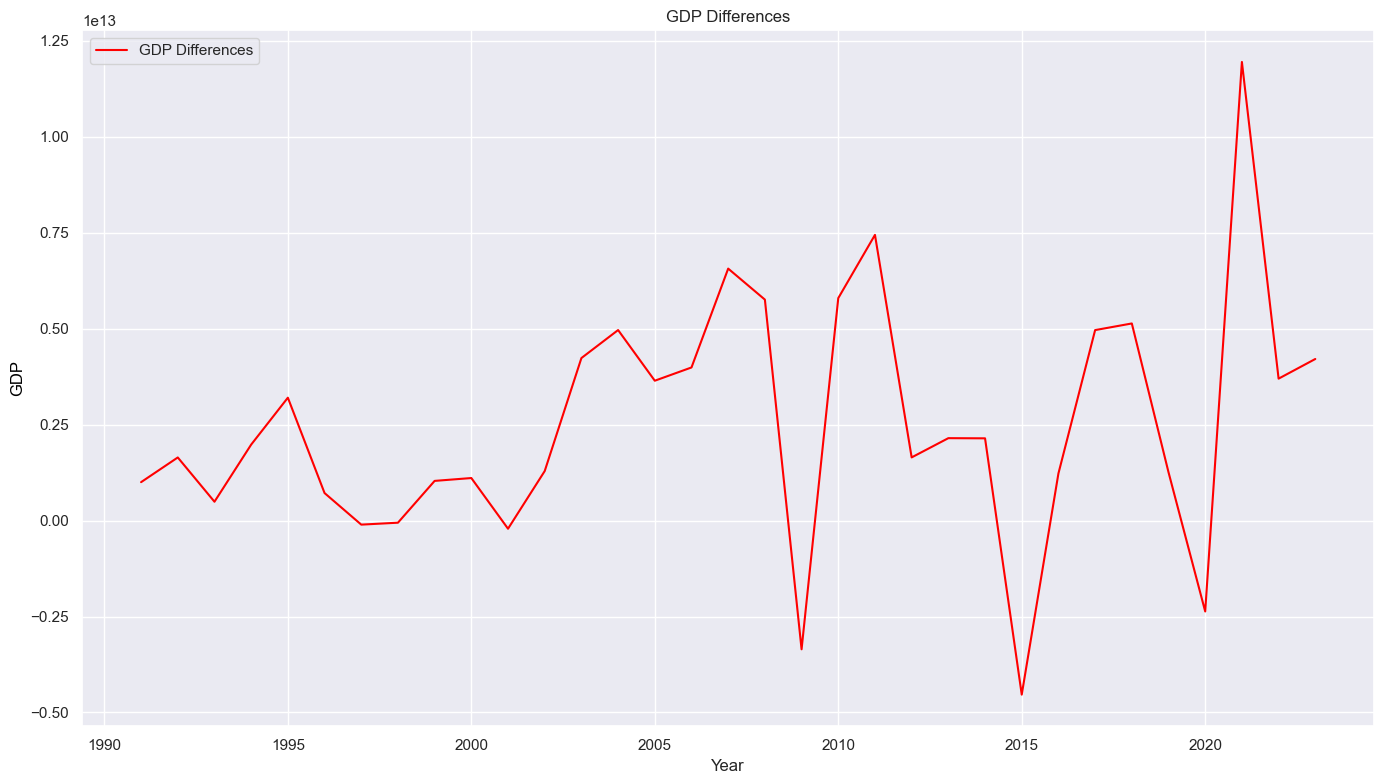

ADF test statistic: -5.278718064100613 P-value: 6.059722695908779e-06
(-5.278718064100613, 6.059722695908779e-06, 0, 32, {'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}, 1338.1919650967293)

KPSS (constant only) test of GDP differences
KPSS (constant-only) test statistic: 0.2701504174611934 P-value: 0.1
(0.2701504174611934, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Visually, I would guess that variance is increasing over time but the ADF and KPSS tests do not seem to agree.



C:\Users\marle\AppData\Local\Temp\ipykernel_5176\2691564394.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x = combined_df['GDP_diff'].dropna(), regression = "c")


'\nAccording to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced GDP is a stationary series at the 5% significance level.\nAccording to the KPSS test, we cannot reject the null hypothesis that differenced GDP is a stationary time series.\nSo we should treat differenced GDP as stationary.\n'

In [19]:
# Stationarity Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF stationarity test
# The null hypothesis is that there is a unit root. The alternative hypothesis that there is no unit root (stationary).
print('\n***ADF stationarity test***')
print('ADF (constant only) test of GDP data')
result = adfuller(combined_df['GDP'], regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)

print('Visually, it is clear that the GDP series does not have a constant mean over time')

# Is GDP trend-stationary?
print('\n***ADF trend-stationarity test***')
print('ADF (constant + trend only) test of GDP data')
result = adfuller(combined_df['GDP'], regression = "ct")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('The ADF test does not provide much evidence against the null hypothesis that GDP is not trend stationary.')

# Is differenced GDP stationary?
print("\nDifferenced World Population")
combined_df['GDP_diff'] = combined_df['GDP'] - combined_df['GDP'].shift()
print(combined_df)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_only', y='GDP_diff', data=combined_df, label='GDP Differences', color='red')
plt.title('GDP Differences')
plt.xlabel('Year')
plt.ylabel('GDP', color='black')
sns.set_theme()
plt.tight_layout()
plt.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\GDP Differences.png')
plt.show()

# Ensure the NA from differencing is removed before the ADF test
result = adfuller(combined_df['GDP_diff'].dropna(), regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('\nKPSS (constant only) test of GDP differences')
result = kpss(x = combined_df['GDP_diff'].dropna(), regression = "c")
print(f'KPSS (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('\nVisually, I would guess that variance is increasing over time but the ADF and KPSS tests do not seem to agree.\n')
'''
According to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced GDP is a stationary series at the 5% significance level.
According to the KPSS test, we cannot reject the null hypothesis that differenced GDP is a stationary time series.
So we should treat differenced GDP as stationary.
'''